In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import math


In [18]:
def make_plot(results):

    sizes = list(set([result[3] for result in results]))
    sizes.sort()
    fig, axs = plt.subplots(1,len(sizes), figsize=(28,6))
        
    fig.suptitle(results[0][2])
    
    for i in range(len(sizes)):
       
        relevant_results = [result for result in results if result[3] == sizes[i]]

        axs[i].set_title(f"size {sizes[i]}")

        legend = []

        for result in relevant_results:
            axs[i].plot(result[0]['average'])
            legend.append(result[1])
        axs[i].legend(legend)
        axs[i].set(xlabel="iterations")


## Grid search results

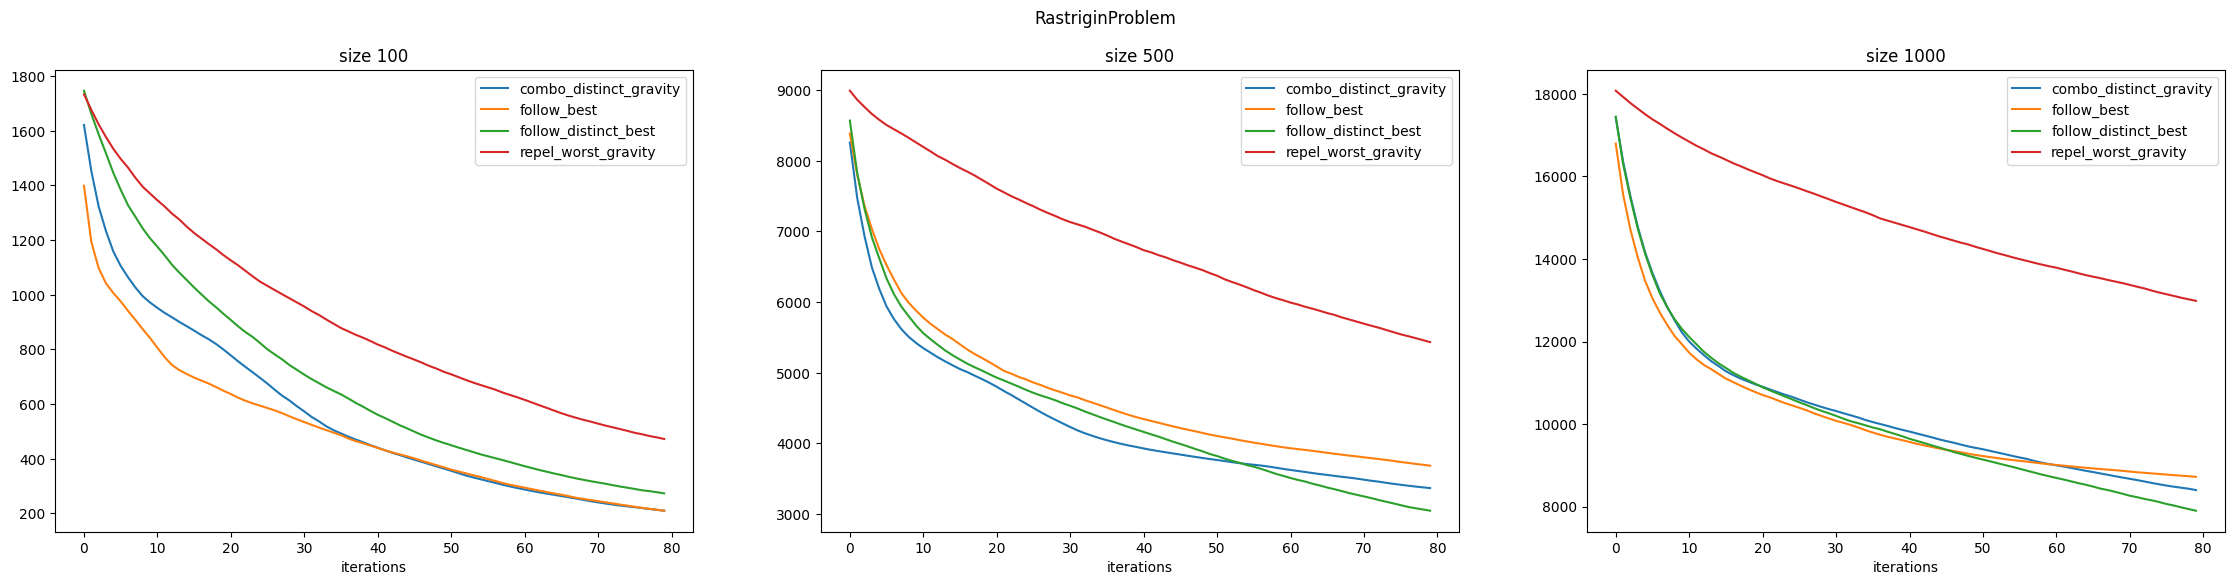

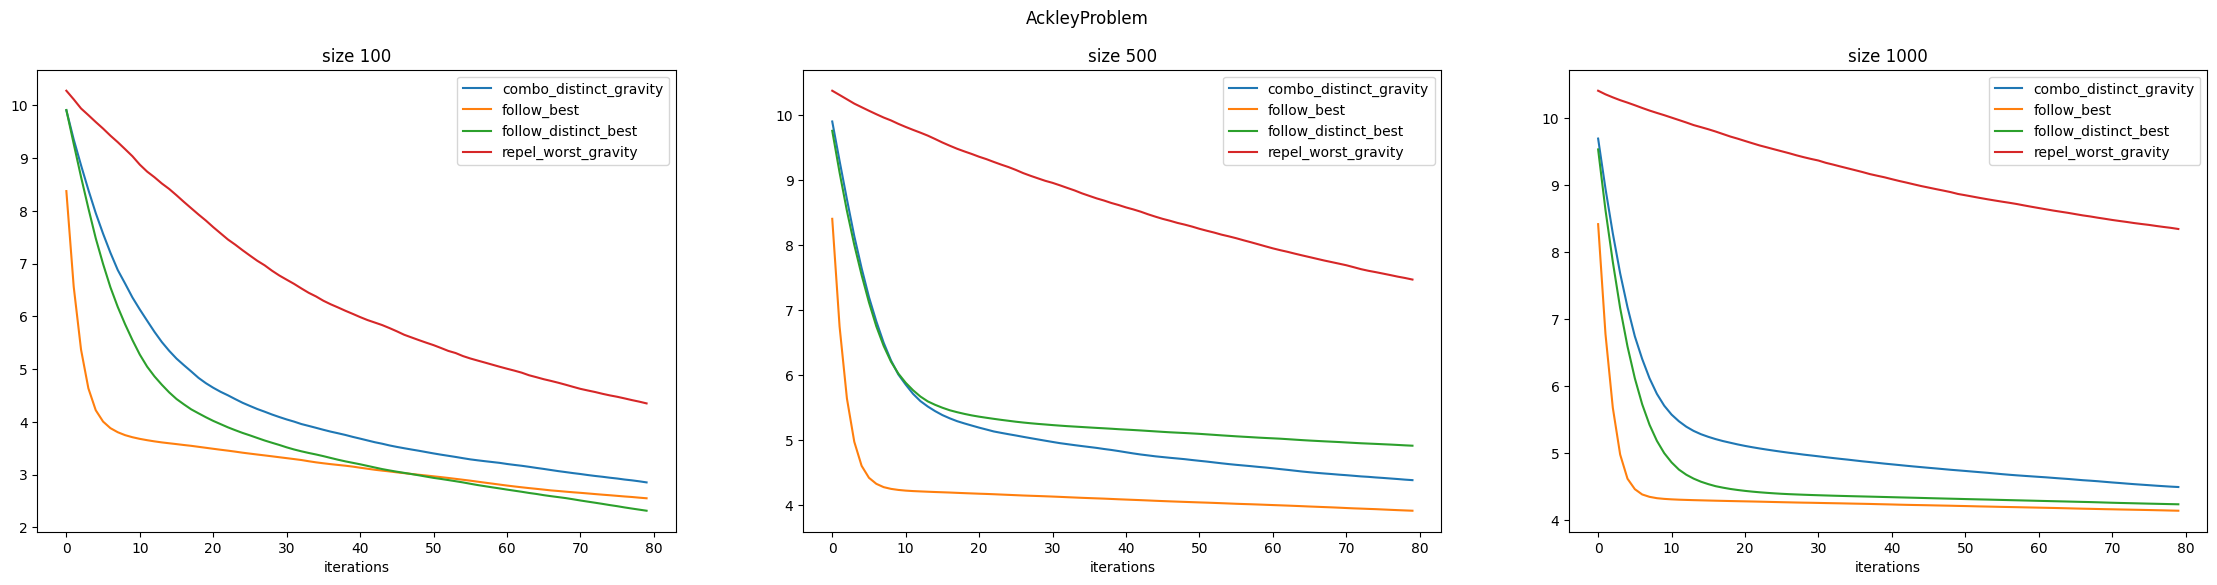

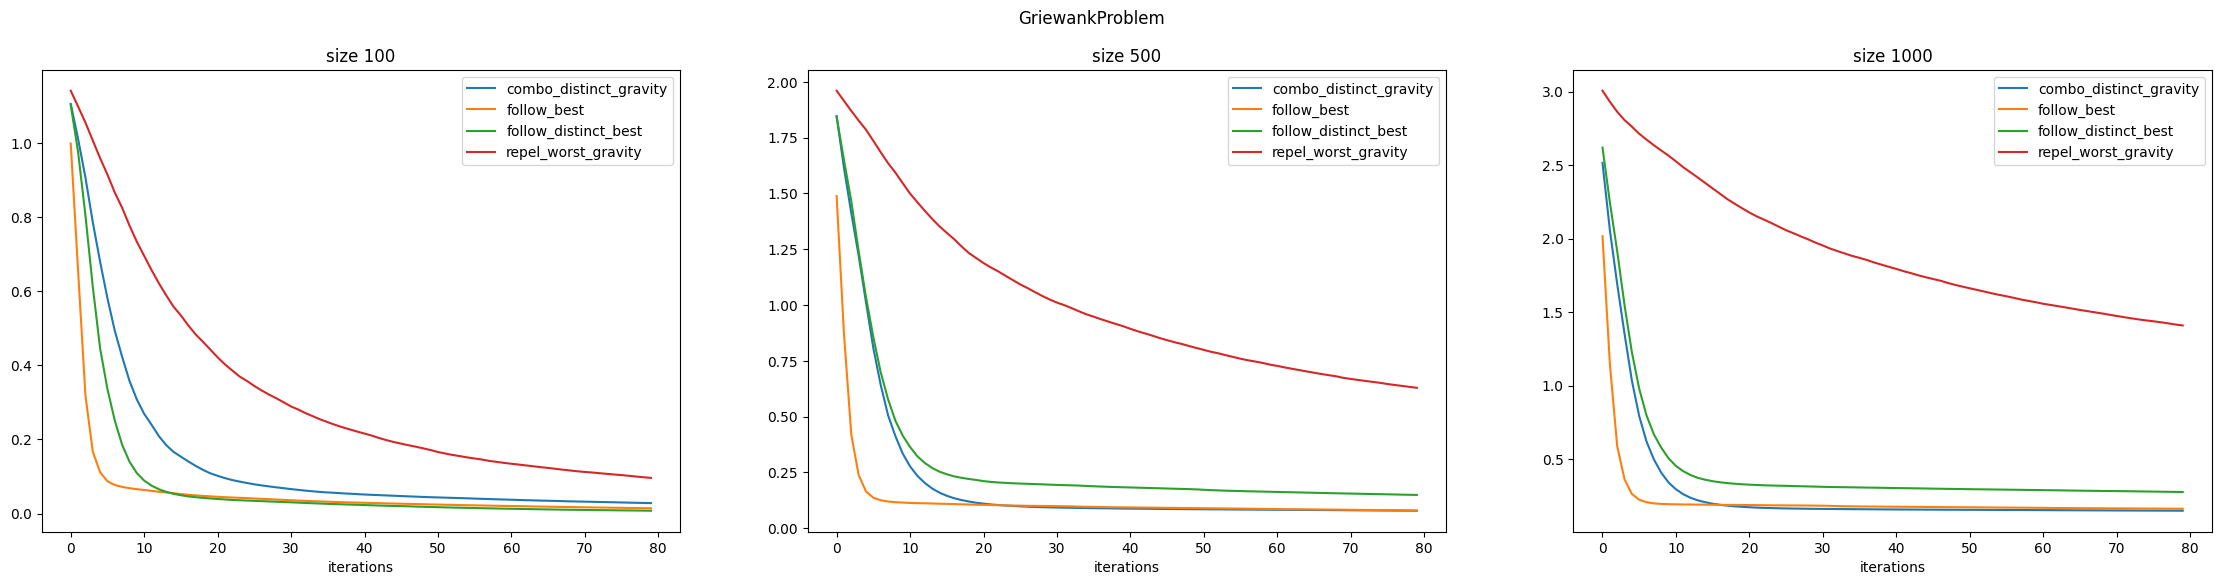

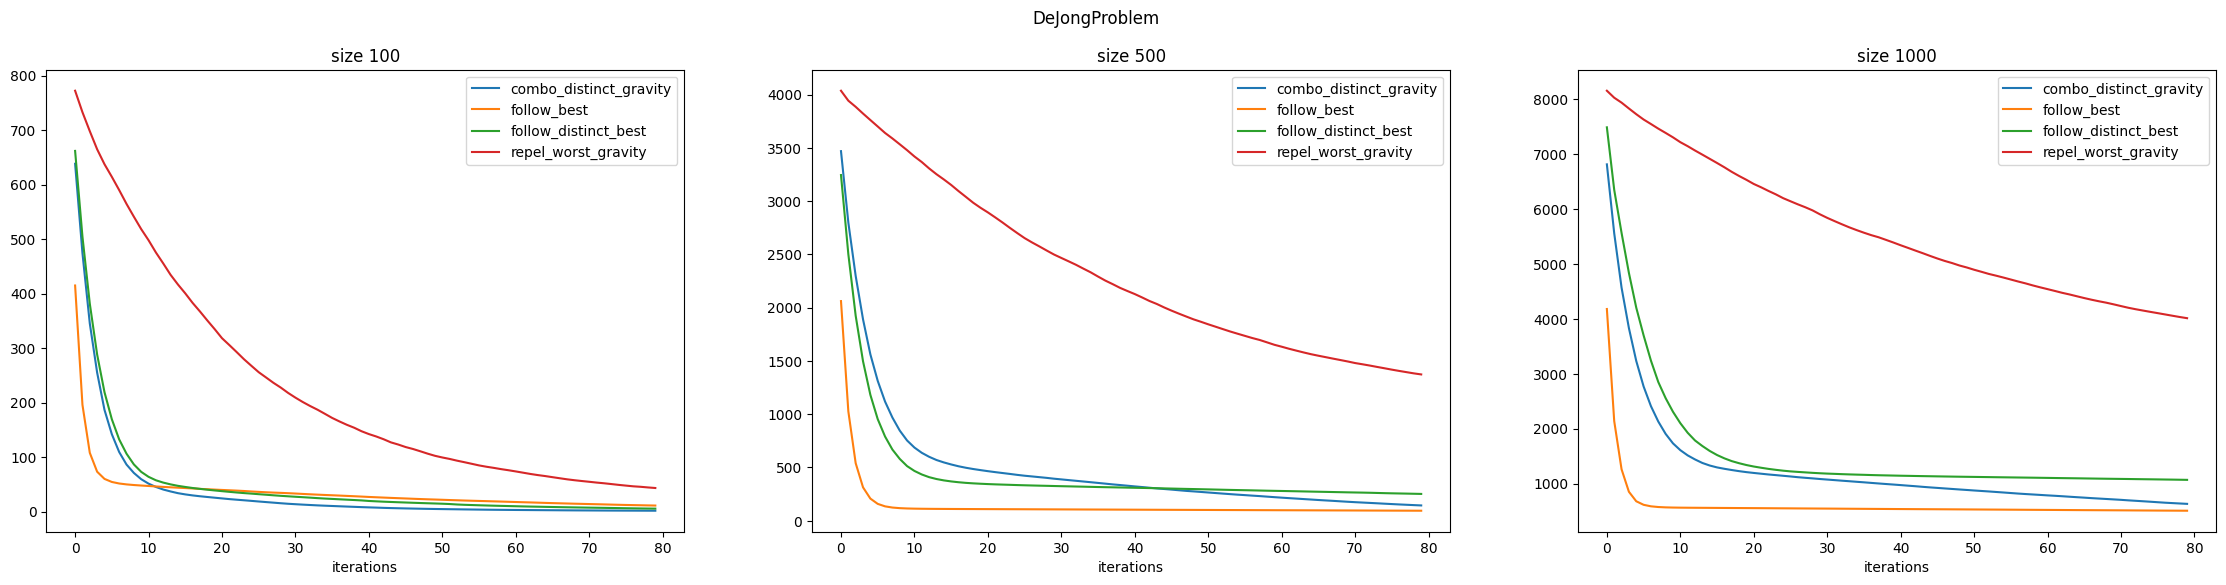

In [24]:
result_files = os.listdir('results')

results = []

for filename in result_files:
    if os.path.isfile(f'results/{filename}'):
        with open(f'results/{filename}','r') as file:
            result = json.loads(file.read())
            
            alg_name = re.search(r'(.*)_[^_]*_[^_]*\.json',filename).group(1)
            
            problem_name = re.search(r'.*_([^_]*)_[^_]*\.json',filename).group(1)
            
            problem_size = int(re.search(r'.*_[^_]*_([^_]*)\.json',filename).group(1))

            results.append((result, alg_name, problem_name, problem_size))
        
        
problems = set(map(lambda x: x[2], results))
              
for problem in problems:
    make_plot([result for result in results if result[2] == problem])

## Last results

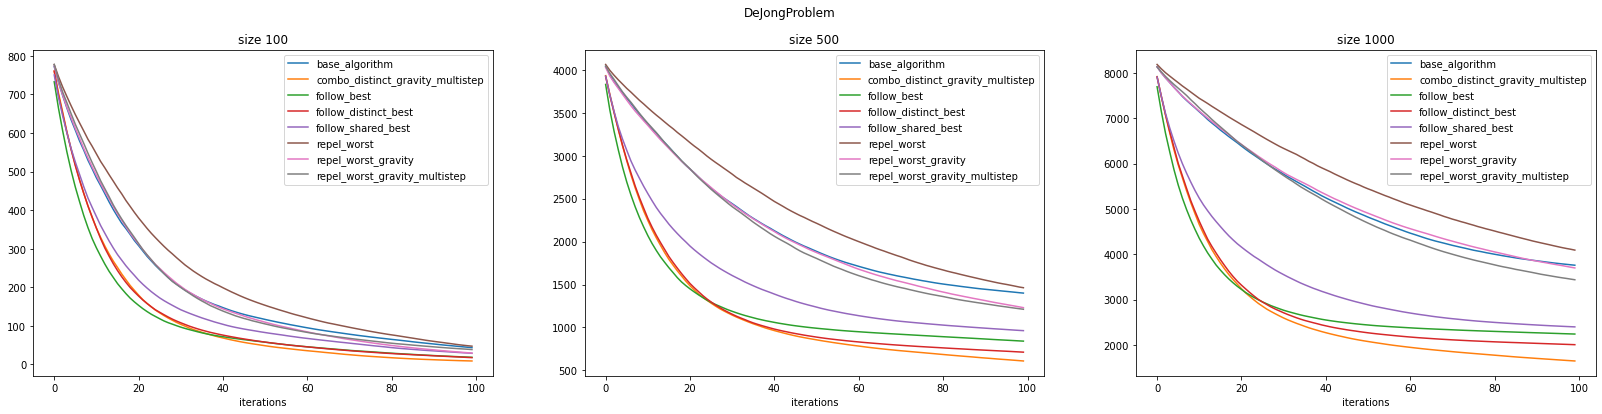

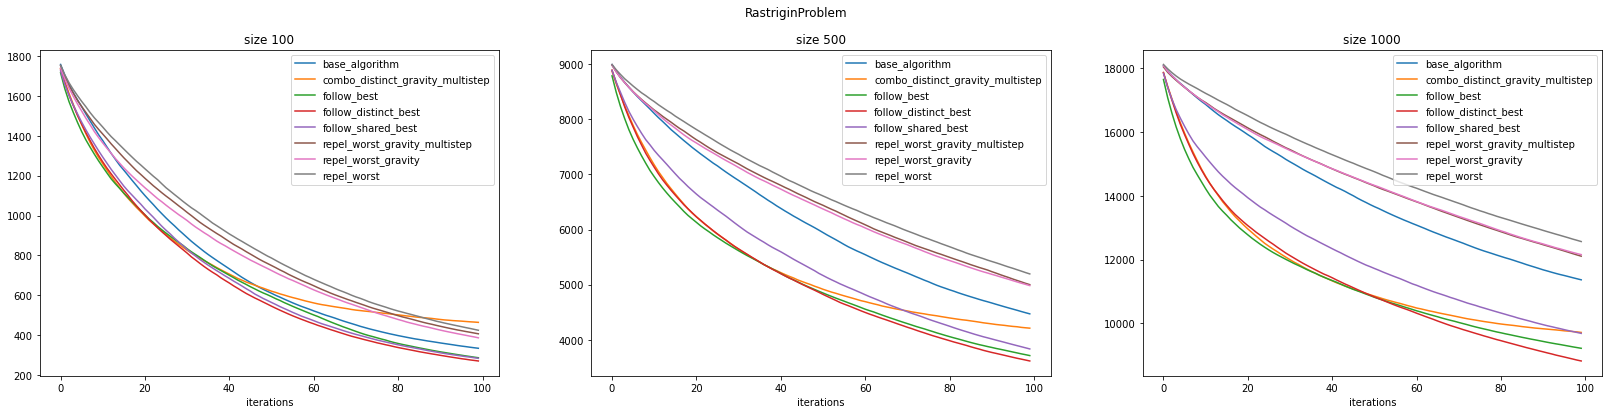

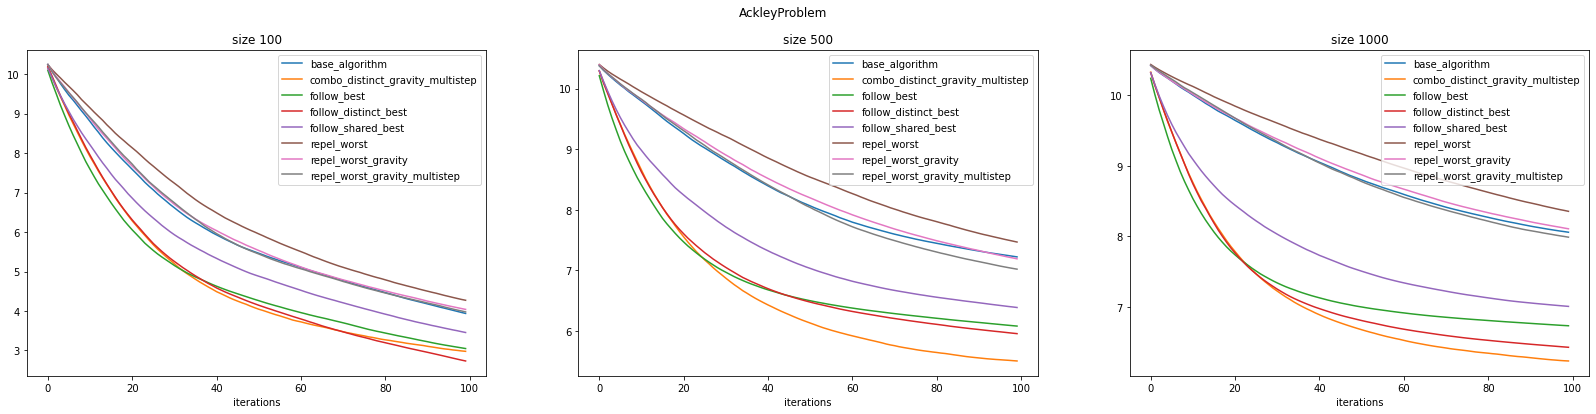

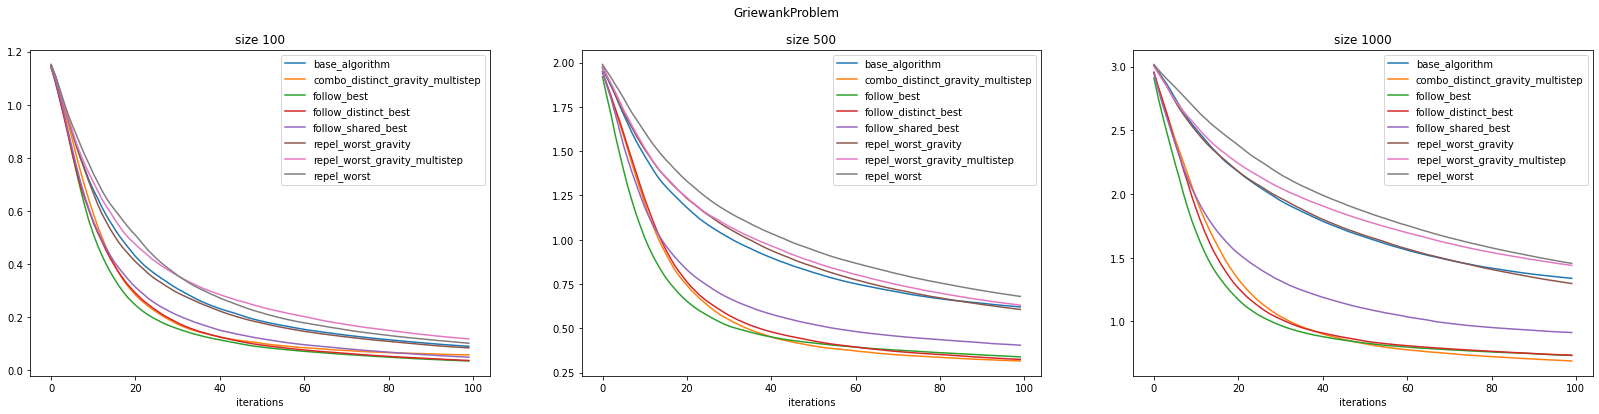

In [ ]:
result_files = os.listdir('results')

results = []

for filename in result_files:
    with open(f'results/{filename}','r') as file:
        result = json.loads(file.read())
        
        alg_name = re.search(r'(.*)_[^_]*_[^_]*\.json',filename).group(1)
        
        problem_name = re.search(r'.*_([^_]*)_[^_]*\.json',filename).group(1)
        
        problem_size = int(re.search(r'.*_[^_]*_([^_]*)\.json',filename).group(1))

        results.append((result, alg_name, problem_name, problem_size))
        
        
problems = set(map(lambda x: x[2], results))
              
for problem in problems:
    make_plot([result for result in results if result[2] == problem])